     Color  Count
0    Black     47
1    White     27
2     Blue     20
3   Silver     14
4     Gray     13
5      Red      9
6   Purple      4
8     Pink      3
9    Green      3
14    Gold      1
15  Yellow      1


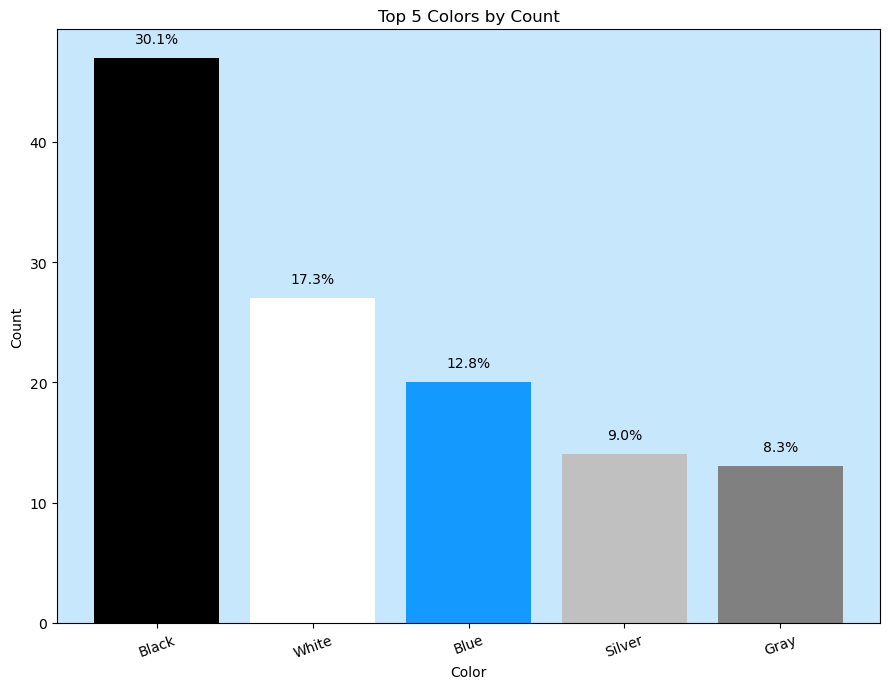

In [189]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

connection = sqlite3.connect("/Users/Habishua/Downloads/Portfolio/Amazon Affiliate/amazon_affiliate_code/amazon.db")

query1 = """ SELECT color_options FROM Products; """

df1 = pd.read_sql_query(query1, connection)

connection.close()

colors_series = df1['color_options'].str.split(',').explode().str.strip()

def normalize_color(color):
    color = color.lower()
    if 'black' in color:
        return 'Black'
    elif 'white' in color:
        return 'White'
    elif 'red' in color:
        return 'Red'
    elif 'stainless' in color:
        return 'Silver'
    elif 'charcoal' in color:
        return 'Gray'
    elif 'grey' in color or 'gray' in color:
        return 'Gray'
    elif any(x in color for x in ['blue', 'navy', 'denim', 'midnight', 'ice', 'aqua']):
        return 'Blue'
    elif any(x in color for x in ['green', 'olive', 'sage']):
        return 'Green'
    else:
        return color.title()  

normalized_colors = colors_series.map(normalize_color)

color_counts = normalized_colors.value_counts().reset_index()
color_counts.columns = ['Color', 'Count']

colors_to_exclude = ['Starlight', 'Graphite', 'Stealth', 'Color', 'Copper', 'Oatmeal', 'Berry', 'Oasis', 'Venetian Bronze', 'Satin Nickel', 'Mineral']

filtered_colors = color_counts[~color_counts['Color'].isin(colors_to_exclude)]

# Print 15 colors and their count
print(filtered_colors)

# Select top 5 colors by count
top5 = color_counts.head(5)

color_map = {
    'Black': '#000000',
    'White': '#FFFFFF',
    'Blue': '#1399FF',   
    'Silver': '#C0C0C0',
    'Gray': '#808080',
}

def get_color(name):
    return color_map.get(name, '#333333')

plt.figure(figsize=(9, 7))
plt.gca().set_facecolor("#C7E7FD")

bars = plt.bar(top5['Color'], top5['Count'], color=[get_color(c) for c in top5['Color']])

plt.title("Top 5 Colors by Count")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=20)

# Calculate percentages
total_count = color_counts['Count'].sum()
percentages = (top5['Count'] / total_count) * 100

# Add percentage labels on top of bars
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{pct:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

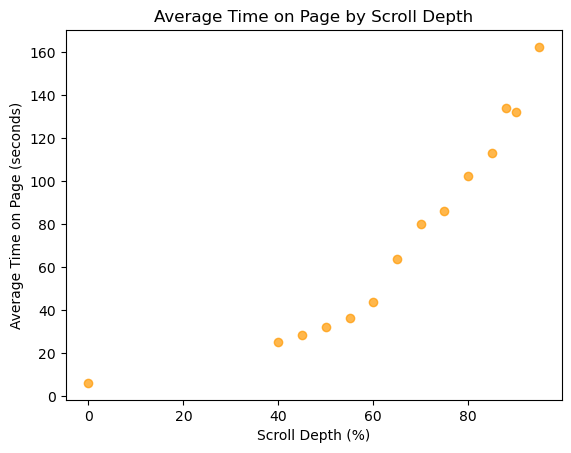

In [167]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

connection = sqlite3.connect("/Users/Habishua/Downloads/Portfolio/Amazon Affiliate/amazon_affiliate_code/amazon.db")

query2 = """ 
SELECT scroll_depth_percentage, AVG(time_on_page_seconds) AS avg_time_on_page
FROM Clicks C
JOIN Behavior B ON C.user_id = B.user_id
GROUP BY scroll_depth_percentage
ORDER BY scroll_depth_percentage
"""

df2 = pd.read_sql_query(query2, connection)
connection.close()

# Scatter plot
plt.scatter(df2['scroll_depth_percentage'], df2['avg_time_on_page'], color='#FF9900', alpha=0.7)

plt.xlabel("Scroll Depth (%)")
plt.ylabel("Average Time on Page (seconds)")
plt.title("Average Time on Page by Scroll Depth")
plt.show()

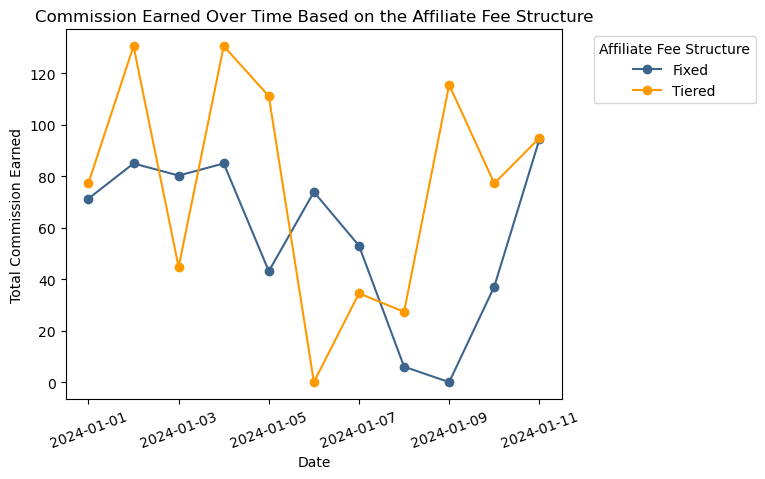

Total commission earned by fee structure:
 affiliate_fee_structure
Fixed     628.72
Tiered    843.41
Name: commission_earned, dtype: float64

Average daily commission by fee structure:
 affiliate_fee_structure
Fixed     62.872
Tiered    84.341
Name: commission_earned, dtype: float64

Maximum single-day commission by fee structure:
 affiliate_fee_structure
Fixed      94.26
Tiered    130.50
Name: commission_earned, dtype: float64

Minimum single-day commission by fee structure:
 affiliate_fee_structure
Fixed      6.0
Tiered    27.3
Name: commission_earned, dtype: float64


In [190]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

connection = sqlite3.connect("/Users/Habishua/Downloads/Portfolio/Amazon Affiliate/amazon_affiliate_code/amazon.db")

query3 = """ 
SELECT B.timestamp, V.commission_earned, V.commission_rate, P.affiliate_fee_structure
FROM Conversions V JOIN Clicks C ON V.user_id = C.user_id
JOIN Products P ON (C.product_asin = P.product_asin) AND (C.product_title = P.product_title)
JOIN Behavior B ON C.user_id = B.user_id
ORDER BY B.timestamp;
"""

df3 = pd.read_sql_query(query3, connection)
connection.close()

df3['timestamp'] = pd.to_datetime(df3['timestamp'])

df3_grouped = (
    df3.groupby([pd.Grouper(key='timestamp', freq='D'), 'affiliate_fee_structure'])['commission_earned'].sum().reset_index()
)

# Pivot so each fee structure becomes its own column
df3_pivot = df3_grouped.pivot(index='timestamp', columns='affiliate_fee_structure', values='commission_earned')
df3_pivot = df3_pivot.fillna(0)

# Plot
colors = {'tiered': '#FF9900', 'fixed': '#3C648C'}

for column in df3_pivot.columns:
    plt.plot(
        df3_pivot.index,
        df3_pivot[column],
        marker='o',
        color=colors.get(column.lower(), 'black'),  
        label=column.capitalize()
    )
    
plt.xlabel("Date")
plt.xticks(rotation=20)
plt.ylabel("Total Commission Earned")
plt.title("Commission Earned Over Time Based on the Affiliate Fee Structure")
plt.legend(title="Affiliate Fee Structure", bbox_to_anchor=(1.05, 1))
plt.show()

# Total commission earned by each fee structure
total_commission = df3.groupby('affiliate_fee_structure')['commission_earned'].sum()
print("Total commission earned by fee structure:\n", total_commission)

# Average daily commission per fee structure
avg_daily_commission = df3_grouped.groupby('affiliate_fee_structure')['commission_earned'].mean()
print("\nAverage daily commission by fee structure:\n", avg_daily_commission)

# Maximum single-day commission per fee structure
max_daily_commission = df3_grouped.groupby('affiliate_fee_structure')['commission_earned'].max()
print("\nMaximum single-day commission by fee structure:\n", max_daily_commission)

# Minimum single-day commission per fee structure
min_daily_commission = df3_grouped.groupby('affiliate_fee_structure')['commission_earned'].min()
print("\nMinimum single-day commission by fee structure:\n", min_daily_commission)

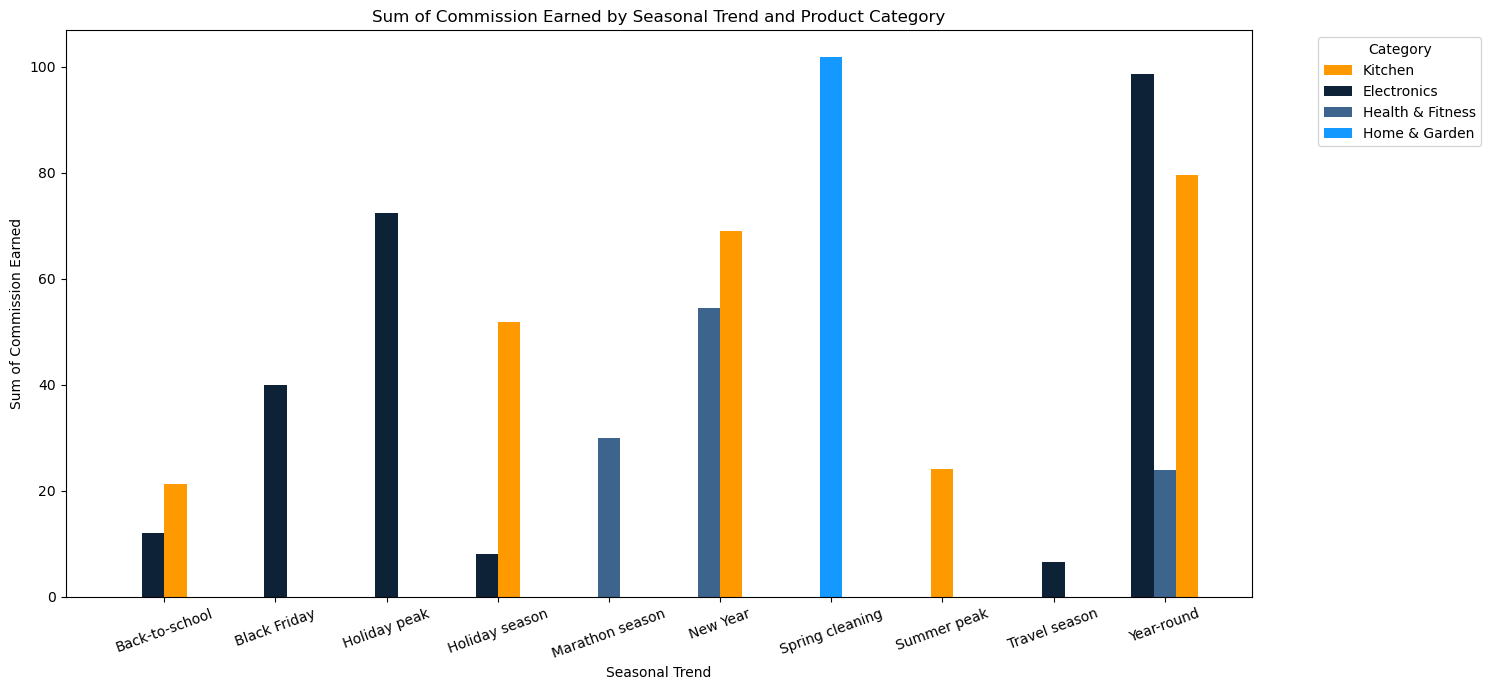

Total commission by category:
 category
Clothing               3.84
Electronics          237.44
Furniture             20.93
Health & Fitness     108.38
Home & Garden        101.75
Home Security         27.80
Kitchen              245.68
Shoes                  2.94
Sports & Outdoors      1.60
Name: total_commission, dtype: float64

Average commission per season by category:
 category
Clothing               3.840000
Electronics           39.573333
Furniture             20.930000
Health & Fitness      36.126667
Home & Garden        101.750000
Home Security         13.900000
Kitchen               49.136000
Shoes                  2.940000
Sports & Outdoors      1.600000
Name: total_commission, dtype: float64

Maximum commission in a single season by category:
 category
Clothing               3.84
Electronics           98.64
Furniture             20.93
Health & Fitness      54.44
Home & Garden        101.75
Home Security         19.80
Kitchen               79.63
Shoes                  2.94
Sp

In [191]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

connection = sqlite3.connect("/Users/Habishua/Downloads/Portfolio/Amazon Affiliate/amazon_affiliate_code/amazon.db")

query4 = """ 
SELECT 
    CASE 
        WHEN P.category IN ('Health & Personal Care', 'Health & Fitness') THEN 'Health & Fitness'
        ELSE P.category 
    END AS category, seasonal_trend, 
    SUM(V.commission_earned) AS total_commission
FROM Conversions V 
JOIN Clicks C ON V.user_id = C.user_id
JOIN Products P ON (C.product_asin = P.product_asin) AND (C.product_title = P.product_title)
GROUP BY seasonal_trend, category;
"""

df4 = pd.read_sql_query(query4, connection)
connection.close()

if df4.duplicated(subset=['seasonal_trend', 'category']).any():
    print("Warning: Duplicate entries found - aggregating again")
    df4 = df4.groupby(['seasonal_trend', 'category'])['total_commission'].sum().reset_index()

# Get the top 4 categories across ALL seasons
top_categories = df4.groupby('category')['total_commission'].sum().nlargest(4).index.tolist()
filtered_df4 = df4[df4['category'].isin(top_categories)]

# Pivot to have seasonal_trend as index and categories as columns
pivot_df4 = filtered_df4.pivot(index='seasonal_trend', columns='category', values='total_commission').fillna(0)

# Create the plot with custom grouping and colors
plt.figure(figsize=(15, 7))
colors = ['#FF9900', '#0D2137', '#3C648C', '#1399FF']
category_colors = dict(zip(top_categories, colors))

# Create positions for grouped bars
seasons = pivot_df4[pivot_df4.sum(axis=1) > 0].index  
x = np.arange(len(seasons))
width = 0.2

# Plot each category
season_centers = []

for i, season in enumerate(seasons):
    season_data = pivot_df4.loc[season]
    present_categories = season_data[season_data > 0].index.tolist()
    values = season_data[present_categories].values

    n_bars = len(present_categories)
    total_width = n_bars * width
    start_x = i - total_width / 2 + width / 2

    season_centers.append(i)

    for j, cat in enumerate(present_categories):
        x_pos = start_x + j * width
        plt.bar(x_pos, values[j], width=width, color=category_colors[cat])

# Legend
for cat in top_categories:
    plt.bar(0, 0, color=category_colors[cat], label=cat)

plt.xticks(season_centers, seasons, rotation=20)
plt.title('Sum of Commission Earned by Seasonal Trend and Product Category')
plt.xlabel('Seasonal Trend')
plt.ylabel('Sum of Commission Earned')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Total commission per category
total_commission_by_category = df4.groupby('category')['total_commission'].sum()
print("Total commission by category:\n", total_commission_by_category)

# Average commission per season per category
avg_commission_by_season = df4.groupby(['category'])['total_commission'].mean()
print("\nAverage commission per season by category:\n", avg_commission_by_season)

# Maximum seasonal commission per category
max_seasonal_commission = df4.groupby('category')['total_commission'].max()
print("\nMaximum commission in a single season by category:\n", max_seasonal_commission)

# Minimum seasonal commission per category
min_seasonal_commission = df4.groupby('category')['total_commission'].min()
print("\nMinimum commission in a single season by category:\n", min_seasonal_commission)